In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [20]:
Cm = 1
g_Na, g_K, g_V = 120, 36, 0.3
E_Na, E_K, E_V = 115, -12, 10.6

In [21]:
def alpha_n(V):
    if V==10:
        return 1 / (np.exp((25-V)/10) * 10) #l'hopital
    else:
        return 0.01 * (10-V) / (np.exp((10-V)/10) - 1)

def alpha_m(V):
    if V==25:
        return 1 / np.exp((25-V)/10)
    else:
        return 0.1 * (25-V) / (np.exp((25-V)/10) - 1)   #l'hopital

def beta_n(V): return 0.125*np.exp(-V/80)
def beta_m(V): return 4*np.exp(-V/18)
def alpha_h(V): return 0.07*np.exp(-V/20)
def beta_h(V): return 1 / (np.exp((30-V)/10))


def I_Na(V,m,h): return g_Na * m**3 * h * (V-E_Na)
def I_K(V,n): return g_K * n**4 * (V-E_K)
def I_V(V): return g_V * (V-E_V)

In [22]:
t = np.arange(0, 30, 0.001) #intervalo de tempo
def J_inj(t):   #corrente injetada
    J = 8.41
    ti = 10
    tf = 11
    return J*(t>ti)-J*(t>tf)

def dALLdt(X, t):
    V, m, h, n = X
    dVdt = (J_inj(t) - I_Na(V,m,h) - I_K(V, n) - I_V(V)) / Cm
    dndt = alpha_n(V) * (1-n) - beta_n(V) * n
    dmdt = alpha_m(V) * (1-m) - beta_m(V) * m
    dhdt = alpha_h(V) * (1-h) - beta_h(V) * h
    return dVdt, dmdt, dhdt, dndt

In [23]:
X = odeint(dALLdt, [0, 0.32, 0.05, 0.6], t)
V = X[:,0]
m = X[:,1]
h = X[:,2]
n = X[:,3]

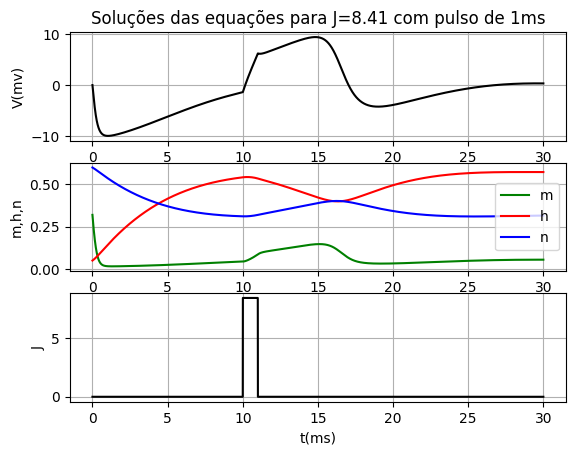

In [24]:
plt.figure()

plt.subplot(3,1,1)
plt.title('Soluções das equações para J=8.41 com pulso de 1ms')
plt.plot(t, V, 'k')
plt.ylabel('V(mv)')
plt.grid()

plt.subplot(3,1,2)
plt.plot(t,m, 'g', label='m')
plt.plot(t,h, 'r', label='h')
plt.plot(t,n, 'b', label='n')
plt.xlabel('t(ms)')
plt.ylabel('m,h,n')
plt.grid()
plt.legend()

plt.subplot(3,1,3)
plt.plot(t, J_inj(t), 'k')
plt.xlabel('t(ms)')
plt.ylabel('J')
plt.grid()

plt.show()